In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Doğrusal regresyon modeli kurarken kullandığımız veri setini kullanacağız.
#Veri setini ekleyip kopyasını alıp düzenleme yapalım.
data=pd.read_csv("Advertising.csv")
df=data.copy()
df=df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#Değişkenleri ve çıktıları ayıralım.
#Çoklu doğrusal regresyon kullanacağımız için bu sefer modele diğer değişkenler de eklenecek.
x=df.iloc[:,0:3]
y=df["sales"]

In [4]:
#Veri setini eğitim ve test olarak 2 bölüme ayırıyoruz.
#Eğitim kısmıyla modeli eğitip sonra da test edeceğiz.
#Eğitim ve test küme oranları genel olarak %70-%30,%80-%20 tercih edilir.
#Random_state parametresi her çalıştığında aynı sonuçları getirmesini sağlar.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=66)

In [5]:
#Statsmodels kütüphanesinden OLS fonksiyonunu kullanarak modeli kuralım.
lm=sm.OLS(y_train,x_train)
model=lm.fit()

In [6]:
#Modelin istatistiksel detayları.
model.summary()
#3 değişkeni de kullanarak veri setinin %98'ini açıklayabilmiş.
#Düzeltilmiş r2 değeri oldukça yüksek, kabul edilebilir bir tahmin.
#Değişkenlerin p-value değerler 0.05 in altında, kabul edilebilir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2706.
Date:                Sun, 26 Jul 2020   Prob (F-statistic):                   2.31e-128
Time:                        20:34:40   Log-Likelihood:                         -315.44
No. Observations:                 150   AIC:                                      636.9
Df Residuals:                     147   BIC:                                      645.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0530      0.001     35.400      0.000       0.050       0.056
radio          0.2253      0.011     20.209      0.000       0.203       0.247
newspaper      0.0178      0.008      2.310      0.022       0.003       0.033
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.026
Skew:                          -0.024   Prob(JB):                        0.987
Kurtosis:                       3.044   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#Katsayıları görebilim.
model.params

TV           0.053021
radio        0.225284
newspaper    0.017780
dtype: float64

In [8]:
#Modelin oluşturduğu denklemini yazdıralım.
denklem=("Sales = "+" TV * "+("%.3f"%model.params[0])+" + "
                                                    +" radio * "+("%.3f"%model.params[1])+" + "
                                                    +" newspaper * "+("%.3f"%model.params[2]))
denklem

'Sales =  TV * 0.053 +  radio * 0.225 +  newspaper * 0.018'

In [9]:
#Kurulan modele test kümesini tahmin ettirelim.
y_pred=model.predict(x_test)

In [10]:
#Modelin hata kareler ortalaması.
print("Test hatası: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Test hatası:  2.103991819437452


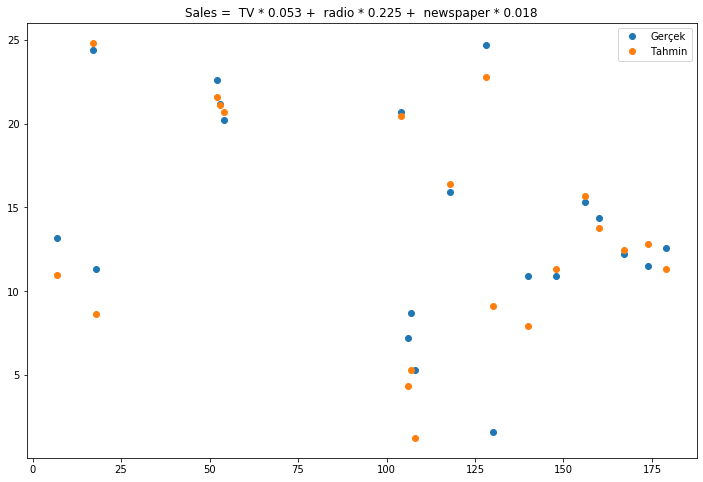

In [11]:
#Tahmin ve gerçek çıktılar arasındaki farkı görmek için grafiğe dökelim.
plt.figure(figsize=(12,8))
plt.title(denklem)
plt.plot(y_test[:20],"o")
plt.plot(y_pred[:20],"o")
plt.legend(["Gerçek","Tahmin"]);
#Her bir gözlem için dikey olarak gerçek değer ve tahmin değeri gösterdik.

In [12]:
#Sklearn kütüphanesini kullanarak model kuralım.
lm=LinearRegression()
model2=lm.fit(x_train,y_train)

In [13]:
print(model2.intercept_,model2.coef_)

2.9884709806055856 [ 0.04501235  0.1905282  -0.00070412]


In [14]:
#Modelin oluşturduğu denklemini yazdıralım.
denklem2=("Sales = "+str("%.3f"%model2.intercept_)+" TV * "
                    +str("%.3f"%model2.coef_[0])+" + "
                    +" radio * "+str("%.3f"%model2.coef_[1])+" + "
                    +" newspaper * "+str("%.3f"%model2.coef_[2]))
denklem2

'Sales = 2.988 TV * 0.045 +  radio * 0.191 +  newspaper * -0.001'

In [15]:
#Modele çıktı değerlerini tahmin ettirelim.
y_pred2=model2.predict(x_train)
y_pred3=model2.predict(x_test)
y_pred3[:10]

array([13.27411062,  6.18867737, 23.16057156, 15.62124682, 20.64628512,
       22.23831916, 13.63778842,  3.63631845,  7.09840981,  9.9962679 ])

In [16]:
#LinearRegressin modelinde tahmin çıktıları array şeklinde döner.
#Düzgün bir şekilde görselleştirmek istiyorsak indexlememiz gerekir.
y_pred2=pd.Series(y_pred2,index=x_train.index)
y_pred3=pd.Series(y_pred3,index=x_test.index)
y_pred3[:10]

167    13.274111
106     6.188677
17     23.160572
118    15.621247
52     20.646285
128    22.238319
174    13.637788
108     3.636318
107     7.098410
18      9.996268
dtype: float64

In [17]:
#Modelimizin r2 skorları.
print("Eğitim r2 skoru:",r2_score(y_train,y_pred2))
print("Test r2 skoru:",r2_score(y_test,y_pred3))

Eğitim r2 skoru: 0.9028589209957651
Test r2 skoru: 0.8797817114430063


In [18]:
#Modelin hata kareler ortalaması.
#LinearRegression fonksiyonu sabit kat sayı ekledeği için hata ortalaması daha düşün çıktı.
print("Eğitim hatası: ",np.sqrt(mean_squared_error(y_train,y_pred2)))
print("Test hatası: ",np.sqrt(mean_squared_error(y_test,y_pred3)))

Eğitim hatası:  1.6136823864357055
Test hatası:  1.8288095684776868


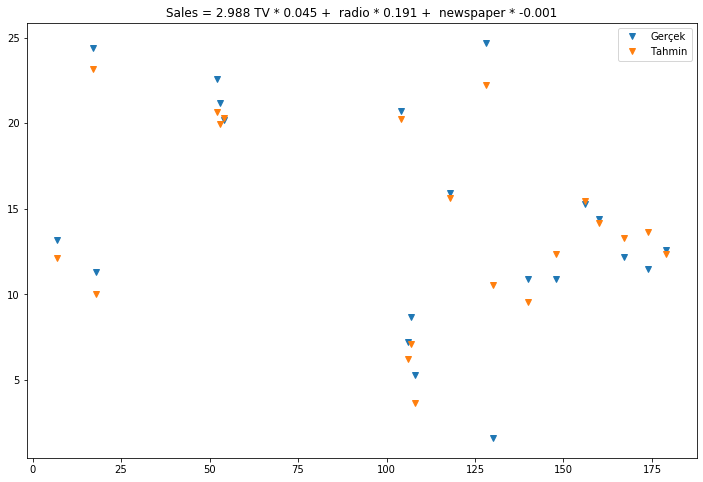

In [19]:
#Gerçek ve tahmin değerleri grafikte daha net görelim.
plt.figure(figsize=(12,8))
plt.plot(y_test[:20],"v")
plt.plot(y_pred3[:20],"v")
plt.title(denklem2)
plt.legend(["Gerçek","Tahmin"]);